## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [3]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y, yp):
    """
    請完成這個 Function 後往下執行
    """
    if len(y)!=len(yp) or len(y)==0 or len(yp)==0: print("Data Error!!!"); return
    return np.sum((np.array(y)-np.array(yp))**2)/len(y)

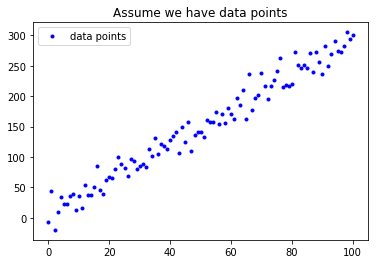

In [5]:
# 與範例相同, 不另外解說
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

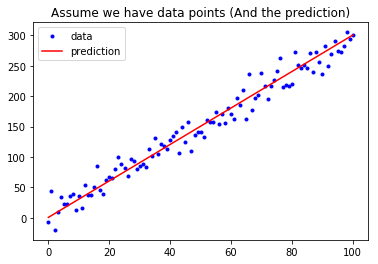

In [6]:
# 與範例相同, 不另外解說
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [11]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 256.860
The Mean absolute error is 12.885


# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

<House Prices: Advanced Regression Techniques>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/notebooks?sortBy=hotness&group=everyone&pageSize=20&language=Python&competitionId=5407&turbolinks%5BrestorationIdentifier%5D=1d136309-218a-498b-ace4-c6016bad19a5

##1. 你選的這組資料為何重要
　　資料為對於買房價格的各種條件、環境變因等紀錄。藉由各種不同因素，進而推知合理房價。

　　對於初買或不熟悉地點的房屋購買者/投資者有相當的助益。(雖然資料地點為波士頓，但仍可以做為基本模型以參考)

##2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)
   資料來源於 City Assessor’s Office
   感謝整理上傳 Dean De Cock - Truman State University
   其內容包含3970件房地產成交案件，並記錄其113個變因，主要地點為Ames，介於2006至2010年間

##3. 蒐集而來的資料型態為何
   A. 結構化：數值, 表格

##4. 這組資料想解決的問題如何評估
   藉由各種不同因素，進而推知合理房價。
   以預估價格與實際價格間的RMSE為依據，判定模型的準確度(範例:https://www.kaggle.com/shaygu/house-prices-begginer-top-7)

# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)
   - 自由載客車隊的主要客群為何？
      -> 短途搭車者、約定叫車者
   - 主要競爭者為何？
      -> 大眾交通工具、其餘同業
   - 優勢為何？
      -> 不須人擠人、點到點客製化服務
   - 成本為何？
      -> 油耗、空車時機會成本
   - 目前營運狀況為何？
      -> 目前台灣臨時招攬車子客戶比率下降，電話、App等提前叫車比率升高
   以上假設結論，以推論問題： 
       a. 臨時招攬車子客戶，是否較偏向於特定時間集中於機場、車站、重大集會場所等地；若有則可安排特定數量種類的車輛於此處候客
       b. 約定叫車者是否具有時間地點的規律趨勢，若有可規劃車隊分化數組，以AB兩地來回載客以漸少空車之機會成本

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)
   收集目前車隊所有接客的資料，包含(約定/臨時叫車、時間、接客地點、目的地、人數、行李多寡等)

3. 蒐集而來的資料型態為何
   A. 結構化：數值, 表格, 地點座標化

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)
   - 可利用K-means分群演算法將地點先分群，若該群涵蓋面積過大，導致成本過高，可考慮放輕比重或放棄該區域市場
   - 以K-means分群後的結果為討論地點，利用其餘的資料條件推估下一段時間地點出現乘客機率，以方便告知駕駛下一步動向
       a. 將時間切割成12個時段
       b. MSE(下個時段的每個地點機率-下個時段的每個地點預測機率)
       c. 機率評估後，仍須考量駕駛目前地點、多少駕駛已前往指定地等因素，再做配給